In [2]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
# MongoClient = MongoClient('localhost', 27017)
# db = MongoClient['Lottery']
# collection = db['Crawl_XSMB']
# data = pd.DataFrame(list(collection.find()))
# data.drop(columns='_id', inplace=True)
# data

In [4]:
with open("XSKT.json", "r") as file:
    data = json.load(file)
data = pd.DataFrame(data)
data

,date,XSMB
0,15-08-2024,72146
1,14-08-2024,34309
2,13-08-2024,74922
3,12-08-2024,79725
4,11-08-2024,70580
...,...,...
7295,25-05-2004,89827
7296,24-05-2004,02254
7297,23-05-2004,77203
7298,22-05-2004,51959


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7300 non-null   object
 1   XSMB    7300 non-null   object
dtypes: object(2)
memory usage: 114.2+ KB


Check frequency of lottery result 

In [6]:
data["XSMB"].value_counts()

XSMB
14516    3
28192    3
95201    3
29224    3
99368    3
        ..
09379    1
20996    1
58309    1
29424    1
04708    1
Name: count, Length: 7052, dtype: int64

Check randomness of odd results and even results

In [7]:
data["odd/even"] = data["XSMB"].astype("int").apply(lambda x: "odd" if x % 2 != 0 else "even")
data["odd/even"].value_counts()

odd/even
even    3690
odd     3610
Name: count, dtype: int64

In [8]:
odd_even_data = data["odd/even"].value_counts().reset_index()

C:\Users\hungl\AppData\Local\Temp\ipykernel_9228\3039627587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="odd/even", data=odd_even_data, palette=colors)


Text(0.5, 1.0, 'Odd/Even frequency in XSMB')

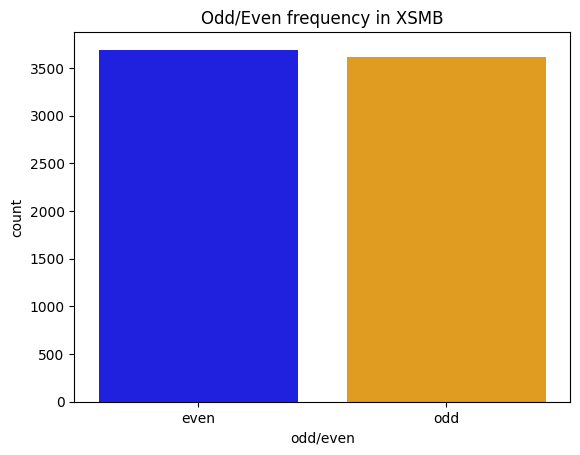

In [9]:
colors = ["blue", "orange"]
sns.barplot(y="count", x="odd/even", data=odd_even_data, palette=colors)
plt.title("Odd/Even frequency in XSMB")

Check randomness of the last 2 digits (the betting number - Đánh đề).
After visualization, the chart describe Uniform Distribution

In [10]:
betting_number = data["XSMB"].str[-2:].value_counts().reset_index()
betting_number

,XSMB,count
0,36,97
1,70,95
2,39,91
3,65,90
4,82,89
...,...,...
95,51,60
96,20,59
97,35,59
98,40,53


Text(0.5, 1.0, 'Frequency of betting number in XSMB')

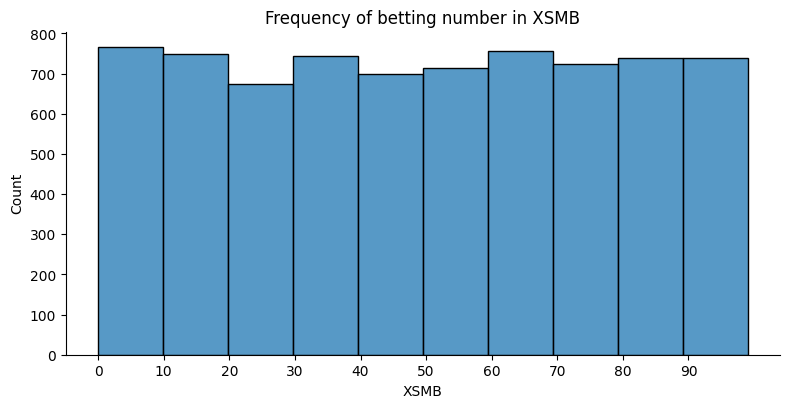

In [11]:
sns.displot(data["XSMB"].str[-2:].astype("int"), bins=10, height=4, aspect=2)
plt.xticks(np.arange(0, 100, 10))
plt.title("Frequency of betting number in XSMB")

Perform a Chi-Square test to prove the randomness of lottery results (5-digit numbers):

In [12]:
from scipy.stats import chisquare

# List of lottery results (5-digit numbers)
lottery_results = data['XSMB'].tolist()
# Flatten the list into individual digits
all_digits = [int(digit) for result in lottery_results for digit in result]

# Calculate observed frequencies of each digit (0-9)
observed_frequencies = np.bincount(all_digits, minlength=10)

# Calculate expected frequencies assuming uniform distribution
# (each digit should appear with equal probability)
total_digits = len(all_digits)
expected_frequencies = np.array([total_digits / 10] * 10)

# Perform the Chi-Square test
chi2_stat, p_value = chisquare(observed_frequencies, expected_frequencies)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("The lottery results do not appear to be random (reject null hypothesis).")
else:
    print("The lottery results appear to be random (fail to reject null hypothesis).")


Chi-Square Statistic: 13.523287671232877
P-Value: 0.1403219064613133
The lottery results appear to be random (fail to reject null hypothesis).


Perform a Chi-Square test to prove the randomness of Betting Number - Đánh đề (last 2-digit numbers):

In [13]:
from scipy.stats import chisquare
# Extract the last two digits of each lottery result
betting_number = data['XSMB'].str[-2:].tolist()
# Flatten the list into individual digits
all_digits = [int(digit) for i in betting_number for digit in i]

# Calculate observed frequencies of each digit (0-9)
observed_frequencies = np.bincount(all_digits, minlength=10)

# Calculate expected frequencies assuming uniform distribution
# (each digit should appear with equal probability)
total_digits = len(all_digits)
expected_frequencies = np.array([total_digits / 10] * 10)

# Perform the Chi-Square test
chi2_stat, p_value = chisquare(observed_frequencies, expected_frequencies)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("The betting-number results do not appear to be random (reject null hypothesis).")
else:
    print("The betting-number results appear to be random (fail to reject null hypothesis).")


Chi-Square Statistic: 7.957534246575342
P-Value: 0.5384313658880496
The betting-number results appear to be random (fail to reject null hypothesis).


Conclusion: 
These methods can provide robust evidence regarding the randomness of lottery results.
Due to the independence and randomness of each draw, there are no patterns to exploit. 
Any attempt to predict future lottery numbers based on past results is statistically futile.
=> Warn about the financial and emotional risks associated with falling for lottery prediction scams. 
People can lose significant amounts of money chasing false hopes.